In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr as pearr

In [2]:
trial_num = 2
avg_rsqr_list = []
for m in range(6):
    model_num = m+1
    tissue_num = 27

    ensg_name = json.load(open('whole_ensg2name.json'))
    name_rsqr = json.load(open('top10_name2rsqr.json'))

    gene_data_name = 'UTMOST_top10_Liver'
    gene_list = os.listdir('../%s/'%gene_data_name)

    r_list = []
    r_ref_list = []
    for g in range(len(gene_list)):
        gene_num = g+1
        gene_name = gene_list[g]
        gene_real_name = ensg_name[gene_name]
        gene_r_score = name_rsqr[gene_real_name]
        r_ref_list.append(gene_r_score)

        GX_observed = np.array([])
        GX_predicted = np.array([])

        for k in range(5):
            k_num = k+1

            try:
                SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d.npy'\
                                  %(trial_num, gene_num, model_num, tissue_num, k_num))
                SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d.npy'\
                                  %(trial_num, gene_num, model_num, tissue_num, k_num))
            except FileNotFoundError:
                print('%d _ last saved snp2 loaded.'%gene_num)
                SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d_last.npy'\
                                  %(trial_num, gene_num, model_num, tissue_num, k_num))
                SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d_last.npy'\
                                  %(trial_num, gene_num, model_num, tissue_num, k_num))

            GX_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trGX_k%d.npy'\
                            %(trial_num, gene_num, model_num, tissue_num, k_num))
            GX_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teGX_k%d.npy'\
                            %(trial_num, gene_num, model_num, tissue_num, k_num))

            GX_observed = np.append(GX_observed, np.reshape(GX_te, -1))
            GX_predicted = np.append(GX_predicted, np.reshape(SNP2_te, -1))
        R_, p = pearr(GX_observed, GX_predicted)
        R2 = R_**2

        r_list.append(R2)
    avg_r = np.mean(r_list)

    avg_rsqr_list.append(avg_r)
        

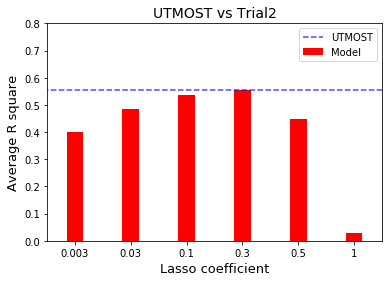

In [4]:
plt.title('UTMOST vs Trial%d'%trial_num, fontsize=14)
plt.bar(np.arange(6), avg_rsqr_list, color='r', width=0.3, label='Model')
plt.plot([-1,6],[avg_utmost, avg_utmost], 'b--', alpha=0.7, label='UTMOST')
plt.xticks(np.arange(6), [0.003, 0.03, 0.1, 0.3, 0.5, 1])
plt.xlabel('Lasso coefficient', fontsize=13)
plt.ylabel('Average R square', fontsize=13)
plt.ylim(0, 0.8)
plt.xlim(-0.5,5.5)
plt.legend()
plt.savefig('img/trial%d/avgrsqr_lasso.png'%trial_num)
plt.show()